In [1]:
import numpy as np
import matplotlib.pyplot as plt

The goal of this notebook is to calculate the expectation mentioned in the ExP4 notes, using a "vanilla" MC estimator in addition to an importance sampling method using a fair coin. We track both the estimators' values for $N = 1, 2, ..., 10000$. Let's setup the arrays we need first. 

In [2]:
N_total = 10000
vanilla_MC_estimate = np.zeros(N_total)
x_samples = []
importance_MC_estimate = np.zeros(N_total)
y_samples = []
weighted_y_samples = []

To simulate the flipping of the coins, I will generate a Bernoulli random variable according to $P$ and $Q$ as defined in my notes at each iteration, and then calculate the MC and importance sampling estimators according to (7) and (11) respectively.

In [3]:
for i in range(N_total):
    xi = np.random.binomial(1, .001)
    yi = np.random.binomial(1, .5)
    if yi == 0:
        # going to multiply by yi == 0 anyway so this is kind of pointless but
        # I put this here for clarity!
        weight = 999/1000 / (1/2)
    else:
        weight = 1/1000 / (1/2)

    x_samples.append(xi)
    y_samples.append(yi)

    weighted_y_samples.append(yi * weight)

    vanilla_MC_estimate[i] = np.mean(x_samples)
    importance_MC_estimate[i] = np.mean(weighted_y_samples)

Let's then plot the estimates. It is clear that the convergence of the importance sampling estimator is much better!

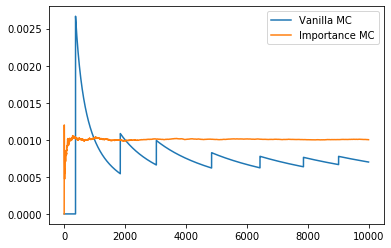

In [4]:
plt.figure()
plt.plot(np.arange(N_total), vanilla_MC_estimate, label='Vanilla MC')
plt.plot(np.arange(N_total), importance_MC_estimate, label='Importance MC')
plt.legend()
plt.show()